In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf  # Import TensorFlow

# Load COVID-19 dataset
df = pd.read_csv('full_grouped.csv')

# The rest of your code remains the same, but use tf.keras instead of keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.layers import Attention



df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,WHO_Region
0,22-01-2020,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,22-01-2020,Albania,0,0,0,0,0,0,0,Europe
2,22-01-2020,Algeria,0,0,0,0,0,0,0,Africa
3,22-01-2020,Andorra,0,0,0,0,0,0,0,Europe
4,22-01-2020,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,27-07-2020,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,27-07-2020,Western Sahara,10,1,8,1,0,0,0,Africa
35153,27-07-2020,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,27-07-2020,Zambia,4552,140,2815,1597,71,1,465,Africa


In [2]:
# Normalize numeric columns
scaler = MinMaxScaler()
num_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [3]:
# Sliding window
window_size = 5
X, y = [], []
for i in range(window_size, len(df)):
    X.append(df[num_cols].values[i-window_size:i])
    y.append(df['Confirmed'].values[i])

X = np.array(X)
y = np.array(y)

# Ensure data types are consistent (convert to float)
X = X.astype('float32')
y = y.astype('float32')



In [4]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [5]:
np.save('X_train', X_train)
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)

In [6]:
X_train_cp = X_train
y_train_cp = y_train
X_test_cp = X_test
y_test_cp = y_test

Epoch 1/100
879/879 [==============================] - 9s 7ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 2/100
879/879 [==============================] - 5s 6ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 3/100
879/879 [==============================] - 5s 6ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 4/100
879/879 [==============================] - 5s 6ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 5/100
879/879 [==============================] - 6s 6ms/step - loss: 0.0053 - val_loss: 0.0058
Epoch 6/100
879/879 [==============================] - 6s 6ms/step - loss: 0.0053 - val_loss: 0.0058
Epoch 7/100
879/879 [==============================] - 6s 6ms/step - loss: 0.0052 - val_loss: 0.0057
Epoch 8/100
879/879 [==============================] - 5s 6ms/step - loss: 0.0052 - val_loss: 0.0056
Epoch 9/100
879/879 [==============================] - 6s 6ms/step - loss: 0.0052 - val_loss: 0.0056
Epoch 10/100
879/879 [==============================] - 6s 6ms/step - loss: 0.0051 - val_lo

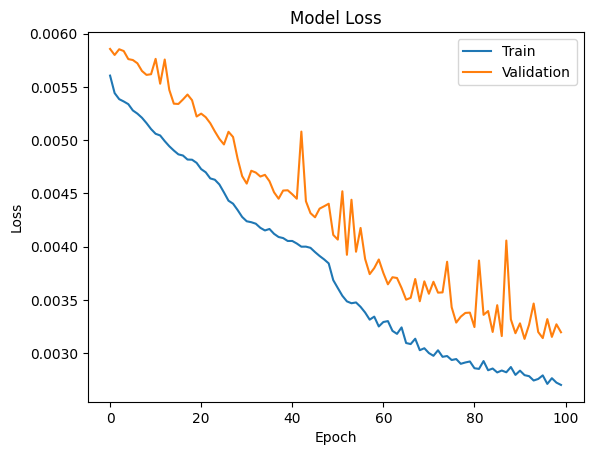

In [8]:
#Stacked LSTM model
import matplotlib.pyplot as plt
stacked_lstm = tf.keras.Sequential() 

# LSTM layer 1
stacked_lstm.add(LSTM(64, activation='relu', return_sequences=True, 
              input_shape=(window_size, X_train.shape[-1])))

# LSTM layer 2 
stacked_lstm.add(LSTM(32, activation='relu'))  

# Output layer
stacked_lstm.add(Dense(1)) 

# Compile model
stacked_lstm.compile(loss='mae', optimizer='adam')  

# Fit model
history_stacked = stacked_lstm.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Evaluate on Test Set
stacked_lstm_mae = stacked_lstm.evaluate(X_test, y_test)
print('MAE:', stacked_lstm_mae)



plt.plot(history_stacked.history['loss'])
plt.plot(history_stacked.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/100
879/879 [==============================] - 14s 9ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 2/100
879/879 [==============================] - 7s 8ms/step - loss: 0.0055 - val_loss: 0.0060
Epoch 3/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 4/100
879/879 [==============================] - 7s 8ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 5/100
879/879 [==============================] - 7s 8ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 6/100
879/879 [==============================] - 7s 8ms/step - loss: 0.0055 - val_loss: 0.0058
Epoch 7/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 8/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0054 - val_loss: 0.0061
Epoch 9/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0054 - val_loss: 0.0057
Epoch 10/100
879/879 [==============================] - 7s 8ms/step - loss: 0.0053 - val_l

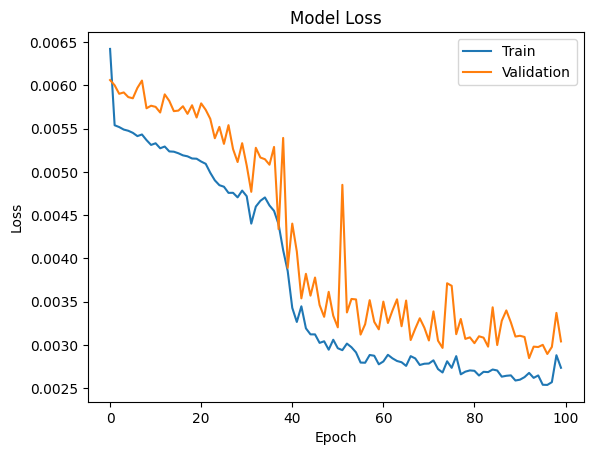

In [9]:
#Modified Stacked lstm model

from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization

# Stacked LSTM model
stacked_lstm_mod = tf.keras.Sequential() 

# LSTM layer 1
stacked_lstm_mod.add(LSTM(64, return_sequences=True)) 

# Transformer layers
stacked_lstm_mod.add(LayerNormalization())  
stacked_lstm_mod.add(Dense(64, activation='relu'))
stacked_lstm_mod.add(Dense(32, activation='relu'))

# LSTM layer 2
stacked_lstm_mod.add(LSTM(32))

# Transformer layer (Remove this)
stacked_lstm_mod.add(tf.keras.layers.Dense(64, activation='relu'))
stacked_lstm_mod.add(tf.keras.layers.Dense(32, activation='relu'))

# Output layer  
stacked_lstm_mod.add(Dense(1))

# Compile and fit as before 
stacked_lstm_mod.compile(optimizer='adam', loss='mae') 

# X_train_lstm = X_train.reshape((-1, window_size, X_train.shape[-1]))
# X_test_lstm = X_test.reshape((-1, window_size, X_train.shape[-1]))

history_stacked_mod = stacked_lstm_mod.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Evaluate on Test Set
stacked_lstm_mae_mod = stacked_lstm_mod.evaluate(X_test, y_test)
print('MAE:', stacked_lstm_mae_mod)



plt.plot(history_stacked_mod.history['loss'])
plt.plot(history_stacked_mod.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/100
879/879 [==============================] - 12s 9ms/step - loss: 0.0093 - val_loss: 0.0064
Epoch 2/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0058 - val_loss: 0.0059
Epoch 3/100
879/879 [==============================] - 7s 8ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 4/100
879/879 [==============================] - 7s 8ms/step - loss: 0.0055 - val_loss: 0.0060
Epoch 5/100
879/879 [==============================] - 7s 8ms/step - loss: 0.0056 - val_loss: 0.0062
Epoch 6/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0055 - val_loss: 0.0061
Epoch 7/100
879/879 [==============================] - 7s 8ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 8/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0054 - val_loss: 0.0061
Epoch 9/100
879/879 [==============================] - 7s 7ms/step - loss: 0.0053 - val_loss: 0.0058
Epoch 10/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0053 - val_l

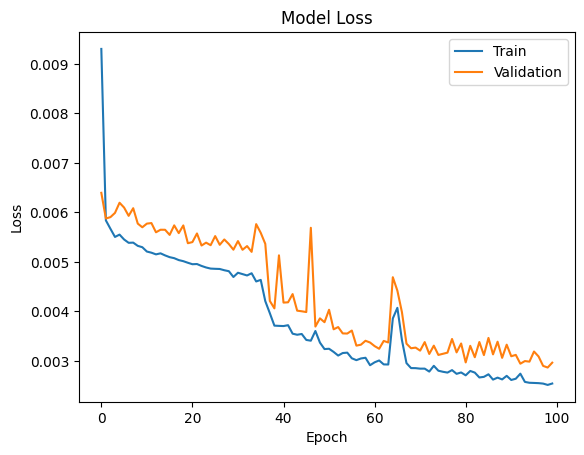

In [10]:
#Modified Stacked lstm model with transformer first

from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization

# Stacked LSTM model
stacked_lstm_mod = tf.keras.Sequential() 

# LSTM layer 1
stacked_lstm_mod.add(LSTM(64, return_sequences=True)) 

# Transformer layers
stacked_lstm_mod.add(LayerNormalization())  
stacked_lstm_mod.add(Dense(64, activation='relu'))
stacked_lstm_mod.add(Dense(32, activation='relu'))

# LSTM layer 2
stacked_lstm_mod.add(LSTM(32))

# Transformer layer
# stacked_lstm_mod.add(tf.keras.layers.Dense(64, activation='relu'))
# stacked_lstm_mod.add(tf.keras.layers.Dense(32, activation='relu'))

# Output layer  
stacked_lstm_mod.add(Dense(1))

# Compile and fit as before 
stacked_lstm_mod.compile(optimizer='adam', loss='mae') 

# X_train_lstm = X_train.reshape((-1, window_size, X_train.shape[-1]))
# X_test_lstm = X_test.reshape((-1, window_size, X_train.shape[-1]))

history_stacked_mod = stacked_lstm_mod.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Evaluate on Test Set
stacked_lstm_mae_mod = stacked_lstm_mod.evaluate(X_test, y_test)
print('MAE:', stacked_lstm_mae_mod)



plt.plot(history_stacked_mod.history['loss'])
plt.plot(history_stacked_mod.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/100
879/879 [==============================] - 33s 23ms/step - loss: 0.0084 - val_loss: 0.0078
Epoch 2/100
879/879 [==============================] - 17s 20ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 3/100
879/879 [==============================] - 17s 20ms/step - loss: 0.0056 - val_loss: 0.0060
Epoch 4/100
879/879 [==============================] - 18s 20ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 5/100
879/879 [==============================] - 17s 20ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 6/100
879/879 [==============================] - 17s 19ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 7/100
879/879 [==============================] - 16s 19ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 8/100
879/879 [==============================] - 17s 19ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 9/100
879/879 [==============================] - 18s 20ms/step - loss: 0.0054 - val_loss: 0.0057
Epoch 10/100
879/879 [==============================] - 17s 19ms/step - l

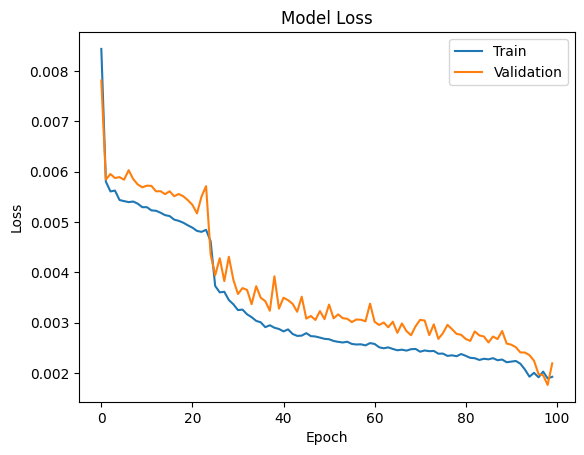

In [11]:
#Modified Stacked lstm model with transformer at the end 

from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization

# Stacked LSTM model
stacked_lstm_mod = tf.keras.Sequential() 

# LSTM layer 1
stacked_lstm_mod.add(LSTM(64, return_sequences=True)) 

# Transformer layers
stacked_lstm_mod.add(LayerNormalization())  
# stacked_lstm_mod.add(Dense(64, activation='relu'))
# stacked_lstm_mod.add(Dense(32, activation='relu'))

# LSTM layer 2
stacked_lstm_mod.add(LSTM(32))

# Transformer layer
stacked_lstm_mod.add(tf.keras.layers.Dense(64, activation='relu'))
stacked_lstm_mod.add(tf.keras.layers.Dense(32, activation='relu'))

# Output layer  
stacked_lstm_mod.add(Dense(1))

# Compile and fit as before 
stacked_lstm_mod.compile(optimizer='adam', loss='mae') 

# X_train_lstm = X_train.reshape((-1, window_size, X_train.shape[-1]))
# X_test_lstm = X_test.reshape((-1, window_size, X_train.shape[-1]))

history_stacked_mod = stacked_lstm_mod.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Evaluate on Test Set
stacked_lstm_mae_mod = stacked_lstm_mod.evaluate(X_test, y_test)
print('MAE:', stacked_lstm_mae_mod)



plt.plot(history_stacked_mod.history['loss'])
plt.plot(history_stacked_mod.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/100
879/879 [==============================] - 9s 6ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 2/100
879/879 [==============================] - 5s 5ms/step - loss: 0.0057 - val_loss: 0.0067
Epoch 3/100
879/879 [==============================] - 5s 5ms/step - loss: 0.0057 - val_loss: 0.0060
Epoch 4/100
879/879 [==============================] - 5s 5ms/step - loss: 0.0056 - val_loss: 0.0062
Epoch 5/100
879/879 [==============================] - 5s 6ms/step - loss: 0.0054 - val_loss: 0.0065
Epoch 6/100
879/879 [==============================] - 5s 6ms/step - loss: 0.0054 - val_loss: 0.0057
Epoch 7/100
879/879 [==============================] - 4s 5ms/step - loss: 0.0054 - val_loss: 0.0057
Epoch 8/100
879/879 [==============================] - 5s 5ms/step - loss: 0.0053 - val_loss: 0.0057
Epoch 9/100
879/879 [==============================] - 5s 6ms/step - loss: 0.0053 - val_loss: 0.0061
Epoch 10/100
879/879 [==============================] - 5s 5ms/step - loss: 0.0053 - val_lo

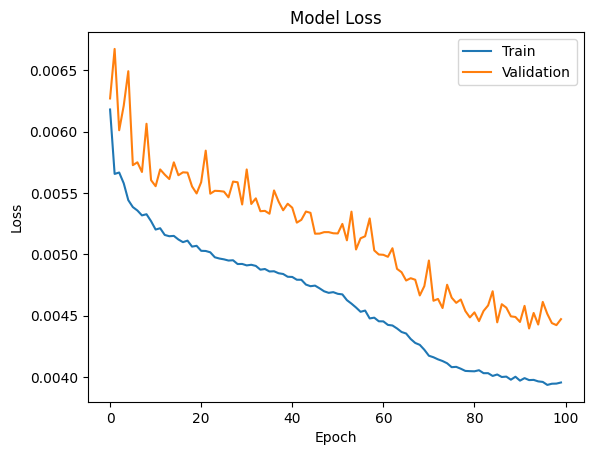

In [12]:
#BiDirectional LSTM Model
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Bidirectional 

bidir_lstm = tf.keras.Sequential()

# Bidirectional LSTM layer
bidir_lstm.add(Bidirectional(LSTM(64, activation='relu')))  

# Output layer 
bidir_lstm.add(Dense(1))  

# Compile model
bidir_lstm.compile(loss='mae', optimizer='adam') 

# Fit model
history_bidir = bidir_lstm.fit(X_train, y_train, epochs=100, 
               validation_data=(X_test, y_test))

# Evaluate on Test Set
bidir_lstm_mae = bidir_lstm.evaluate(X_test, y_test)
print('MAE:', bidir_lstm_mae)


plt.plot(history_bidir.history['loss'])
plt.plot(history_bidir.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/100
879/879 [==============================] - 7s 5ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 2/100
879/879 [==============================] - 4s 4ms/step - loss: 0.0061 - val_loss: 0.0064
Epoch 3/100
879/879 [==============================] - 3s 4ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 4/100
879/879 [==============================] - 4s 4ms/step - loss: 0.0057 - val_loss: 0.0065
Epoch 5/100
879/879 [==============================] - 4s 4ms/step - loss: 0.0056 - val_loss: 0.0071
Epoch 6/100
879/879 [==============================] - 3s 4ms/step - loss: 0.0056 - val_loss: 0.0061
Epoch 7/100
879/879 [==============================] - 3s 4ms/step - loss: 0.0055 - val_loss: 0.0060
Epoch 8/100
879/879 [==============================] - 4s 5ms/step - loss: 0.0055 - val_loss: 0.0058
Epoch 9/100
879/879 [==============================] - 4s 4ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 10/100
879/879 [==============================] - 3s 4ms/step - loss: 0.0054 - val_lo

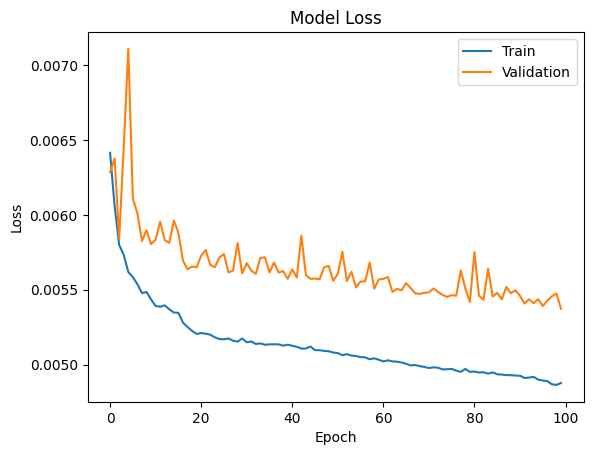

In [13]:
#LSTM MODEL
import matplotlib.pyplot as plt

model = Sequential()
model.add(LSTM(64, input_shape=(window_size, X_train.shape[-1])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test))

# Evaluate on Test Set
mae = model.evaluate(X_test, y_test)
print('MAE:', mae)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/100
879/879 [==============================] - 7s 5ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 2/100
879/879 [==============================] - 4s 4ms/step - loss: 0.0064 - val_loss: 0.0059
Epoch 3/100
879/879 [==============================] - 4s 4ms/step - loss: 0.0062 - val_loss: 0.0069
Epoch 4/100
879/879 [==============================] - 4s 4ms/step - loss: 0.0060 - val_loss: 0.0074
Epoch 5/100
879/879 [==============================] - 3s 4ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 6/100
879/879 [==============================] - 4s 4ms/step - loss: 0.0059 - val_loss: 0.0061
Epoch 7/100
879/879 [==============================] - 4s 4ms/step - loss: 0.0059 - val_loss: 0.0064
Epoch 8/100
879/879 [==============================] - 3s 4ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 9/100
879/879 [==============================] - 4s 4ms/step - loss: 0.0057 - val_loss: 0.0060
Epoch 10/100
879/879 [==============================] - 3s 4ms/step - loss: 0.0056 - val_lo

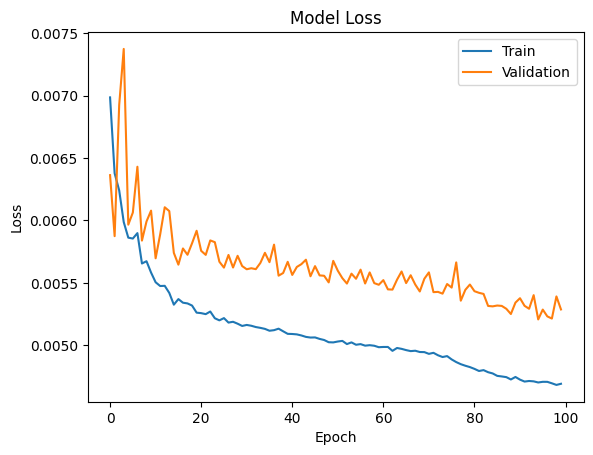

In [14]:
# CNN-GRU Model
cnn_gru_model = Sequential()
cnn_gru_model.add(GRU(64, input_shape=(window_size, X.shape[-1])))
cnn_gru_model.add(Dense(1))
cnn_gru_model.compile(loss='mae', optimizer='adam')
history=cnn_gru_model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test))

# Evaluate on Test Set
cnn_gru_mae = cnn_gru_model.evaluate(X_test, y_test)
print('MAE:', cnn_gru_mae)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Epoch 1/100
879/879 [==============================] - 3s 3ms/step - loss: 0.0135 - val_loss: 0.0096
Epoch 2/100
879/879 [==============================] - 3s 3ms/step - loss: 0.0075 - val_loss: 0.0080
Epoch 3/100
879/879 [==============================] - 3s 3ms/step - loss: 0.0072 - val_loss: 0.0060
Epoch 4/100
879/879 [==============================] - 3s 3ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 5/100
879/879 [==============================] - 3s 3ms/step - loss: 0.0072 - val_loss: 0.0065
Epoch 6/100
879/879 [==============================] - 2s 3ms/step - loss: 0.0073 - val_loss: 0.0082
Epoch 7/100
879/879 [==============================] - 3s 3ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 8/100
879/879 [==============================] - 3s 3ms/step - loss: 0.0071 - val_loss: 0.0112
Epoch 9/100
879/879 [==============================] - 3s 3ms/step - loss: 0.0073 - val_loss: 0.0075
Epoch 10/100
879/879 [==============================] - 3s 3ms/step - loss: 0.0073 - val_lo

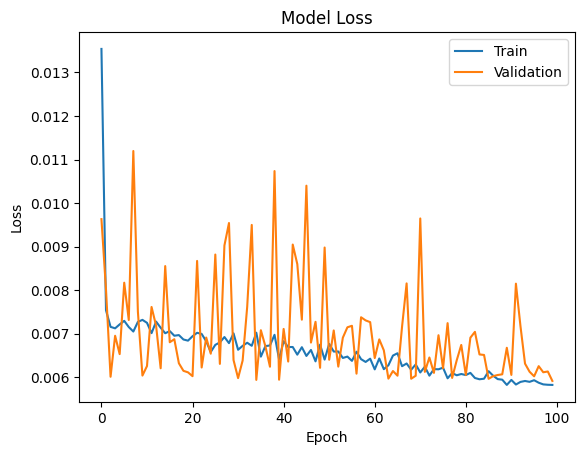

In [15]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

# RBM Layer Definition
class RBM(tf.keras.layers.Layer):
    def __init__(self, num_hidden, activation=tf.nn.sigmoid, **kwargs):
        super(RBM, self).__init__(**kwargs)
        self.num_hidden = num_hidden
        self.activation = activation

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", (input_shape[-1], self.num_hidden), initializer="uniform")
        self.bias_hidden = self.add_weight("bias_hidden", (self.num_hidden,), initializer="zeros")
        self.bias_visible = self.add_weight("bias_visible", (input_shape[-1],), initializer="zeros")
        super().build(input_shape)

    def call(self, inputs):
        hidden = self.activation(K.dot(inputs, self.kernel) + self.bias_hidden)
        visible = self.activation(K.dot(hidden, K.transpose(self.kernel)) + self.bias_visible)
        return visible

# Create RBM Model
rbm_model = Sequential()
rbm_model.add(RBM(64, input_shape=(window_size, X.shape[-1])))
rbm_model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression
rbm_model.compile(loss='mae', optimizer='adam')
history=rbm_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

print('RBM MAE:', rbm_model.evaluate(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/100
879/879 [==============================] - 3s 3ms/step - loss: 0.0088 - val_loss: 0.0079
Epoch 2/100
879/879 [==============================] - 2s 3ms/step - loss: 0.0080 - val_loss: 0.0076
Epoch 3/100
879/879 [==============================] - 2s 2ms/step - loss: 0.0080 - val_loss: 0.0095
Epoch 4/100
879/879 [==============================] - 2s 3ms/step - loss: 0.0083 - val_loss: 0.0065
Epoch 5/100
879/879 [==============================] - 2s 3ms/step - loss: 0.0085 - val_loss: 0.0060
Epoch 6/100
879/879 [==============================] - 2s 3ms/step - loss: 0.0082 - val_loss: 0.0068
Epoch 7/100
879/879 [==============================] - 2s 3ms/step - loss: 0.0085 - val_loss: 0.0126
Epoch 8/100
879/879 [==============================] - 2s 3ms/step - loss: 0.0080 - val_loss: 0.0073
Epoch 9/100
879/879 [==============================] - 2s 3ms/step - loss: 0.0076 - val_loss: 0.0140
Epoch 10/100
879/879 [==============================] - 2s 3ms/step - loss: 0.0083 - val_lo

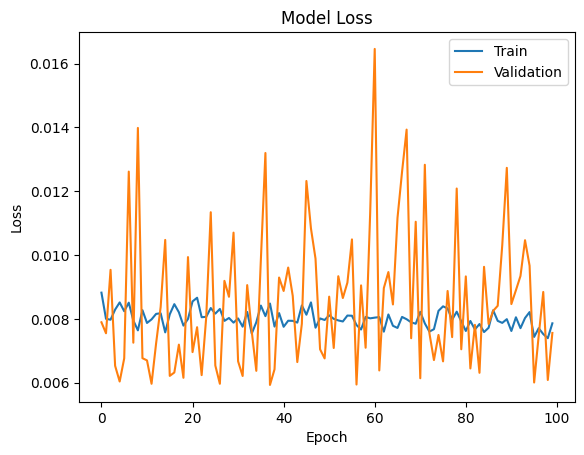

In [16]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Define a custom layer for DBN-like architecture
class DBNLayer(tf.keras.layers.Layer):
    def __init__(self, num_hidden, activation=tf.nn.sigmoid, **kwargs):
        super(DBNLayer, self).__init__(**kwargs)
        self.num_hidden = num_hidden
        self.activation = activation

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", (input_shape[-1], self.num_hidden), initializer="uniform")
        self.bias_hidden = self.add_weight("bias_hidden", (self.num_hidden,), initializer="zeros")
        super().build(input_shape)

    def call(self, inputs):
        hidden = self.activation(tf.matmul(inputs, self.kernel) + self.bias_hidden)
        return hidden

# Create DBN-like Model
dbn_model = Sequential()
dbn_model.add(DBNLayer(64, input_shape=(window_size, X.shape[-1])))
dbn_model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression
dbn_model.compile(loss='mae', optimizer='adam')
history=dbn_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

print('DBN-like MAE:', dbn_model.evaluate(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Epoch 1/100
879/879 [==============================] - 8s 7ms/step - loss: 0.0065 - val_loss: 0.0068
Epoch 2/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0061 - val_loss: 0.0073
Epoch 3/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0060 - val_loss: 0.0071
Epoch 4/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 5/100
879/879 [==============================] - 5s 6ms/step - loss: 0.0058 - val_loss: 0.0065
Epoch 6/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0058 - val_loss: 0.0060
Epoch 7/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0057 - val_loss: 0.0060
Epoch 8/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0058 - val_loss: 0.0063
Epoch 9/100
879/879 [==============================] - 5s 6ms/step - loss: 0.0057 - val_loss: 0.0062
Epoch 10/100
879/879 [==============================] - 6s 7ms/step - loss: 0.0056 - val_lo

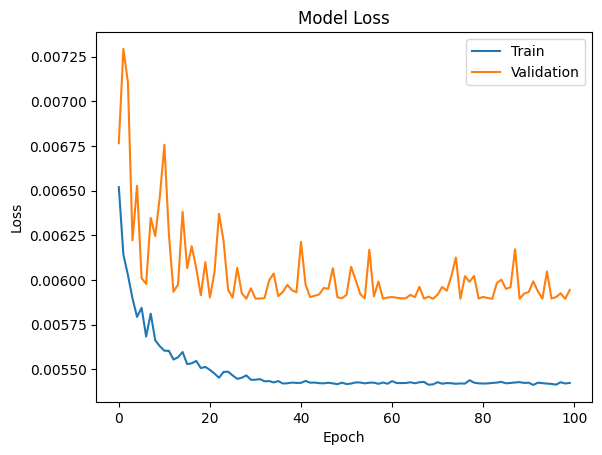

In [17]:
# Self-Attention RNN
import tensorflow as tf

# Define your sequence length and number of features based on your data
sequence_length = 5  # Replace with the actual sequence length
features = 64  # Replace with the number of features in your data

# Self-Attention RNN using MultiHeadAttention
from tensorflow.keras.layers import MultiHeadAttention

rnn_model = tf.keras.Sequential()
rnn_model.add(tf.keras.layers.GRU(64, return_sequences=True, input_shape=(window_size, X.shape[-1])))

# Create a query tensor based on your data dimensions
query = tf.keras.layers.Input(shape=(sequence_length, features))  # Modify this according to your data

# Apply MultiHeadAttention with both query and value inputs
attention_layer = MultiHeadAttention(num_heads=1, key_dim=64, value_dim=64)
output = attention_layer(query, query)  # Use the same query tensor for both query and value

# Concatenate the output of MultiHeadAttention with the GRU output
concatenated_output = tf.keras.layers.Concatenate(axis=-1)([rnn_model.output, output])

# You may need to add a Flatten layer here depending on the shape of your output
# rnn_model.add(tf.keras.layers.Flatten())

# Add the rest of your layers
rnn_model.add(tf.keras.layers.Dense(1))
rnn_model.compile(loss='mae', optimizer='adam')
history=rnn_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

print('RNN MAE:', rnn_model.evaluate(X_test, y_test))


import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#ConvLSTM Model #not working
import matplotlib.pyplot as plt
from tensorflow.keras.layers import ConvLSTM2D, Dense, GlobalAveragePooling2D, TimeDistributed, Input
import tensorflow as tf

# Assuming window_size is the number of time steps you want to consider
window_size = 5

# Input layer with variable sequence length
input_layer = Input(shape=(None, window_size, X_train.shape[-1], 1))

conv_lstm = tf.keras.Sequential()

# ConvLSTM2D layer
conv_lstm.add(ConvLSTM2D(filters=64, kernel_size=(3, 3),
                         padding='same', return_sequences=True,
                         input_shape=(None, X_train.shape[2], X_train.shape[3], 1)))

# TimeDistributed layer to apply GlobalAveragePooling2D across the time dimension
conv_lstm.add(TimeDistributed(GlobalAveragePooling2D(data_format='channels_last')))

# Output layer
conv_lstm.add(Dense(64, activation='relu'))  # Choose an appropriate size and activation function
conv_lstm.add(Dense(1))  # Output layer

# Compile
conv_lstm.compile(loss='mae', optimizer='adam')

# Reshape input to add channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3], 1)


# Fit model
history_convlstm = conv_lstm.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Evaluate on Test Set
conv_lstm_mae = conv_lstm.evaluate(X_test, y_test)
print('MAE:', conv_lstm_mae)



plt.plot(history_convlstm.history['loss'])
plt.plot(history_convlstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


IndexError: tuple index out of range

In [18]:
#ConvLSTM Model
import matplotlib.pyplot as plt
from tensorflow.keras.layers import ConvLSTM2D, Dense, GlobalAveragePooling2D, TimeDistributed, Input
import tensorflow as tf
# Print shape to verify dimensions
# Load and preprocess data

# Confirm shape of input data 
print("X_train shape:", X_train.shape)

window_size = X_train.shape[1]
num_features = X_train.shape[2]

# Define model
model = Sequential()

# Input shape is now (batch, timeSteps, features)  
model.add(ConvLSTM2D(filters=64, kernel_size=(3, 3),
               padding='same', return_sequences=True, 
               input_shape=(window_size, num_features, 1, 1)))
               
model.add(TimeDistributed(GlobalAveragePooling2D()))

model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')


# Add extra dimensions to match input shape requirements 
X_train = X_train.reshape(X_train.shape[0], window_size, num_features, 1, 1)  
X_test = X_test.reshape(X_test.shape[0], window_size, num_features, 1, 1)   

# Train model
model.fit(X_train, y_train, 
         epochs=100, 
         validation_data=(X_test, y_test))
         
# Evaluate         


X_train shape: (28120, 5, 7)
Epoch 1/100
879/879 [==============================] - 15s 15ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 2/100
879/879 [==============================] - 12s 14ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 3/100
879/879 [==============================] - 12s 14ms/step - loss: 0.0054 - val_loss: 0.0061
Epoch 4/100
879/879 [==============================] - 12s 14ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 5/100
879/879 [==============================] - 12s 14ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 6/100
879/879 [==============================] - 12s 14ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 7/100
879/879 [==============================] - 13s 14ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 8/100
879/879 [==============================] - 13s 15ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 9/100
879/879 [==============================] - 13s 15ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 10/100
879/879 [======================

Epoch 1/100
879/879 [==============================] - 13s 15ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 2/100
879/879 [==============================] - 18s 21ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 3/100
879/879 [==============================] - 18s 20ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 4/100
879/879 [==============================] - 17s 20ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 5/100
879/879 [==============================] - 17s 19ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 6/100
879/879 [==============================] - 17s 19ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 7/100
879/879 [==============================] - 14s 16ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 8/100
879/879 [==============================] - 13s 15ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 9/100
879/879 [==============================] - 14s 16ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 10/100
879/879 [==============================] - 19s 22ms/step - l

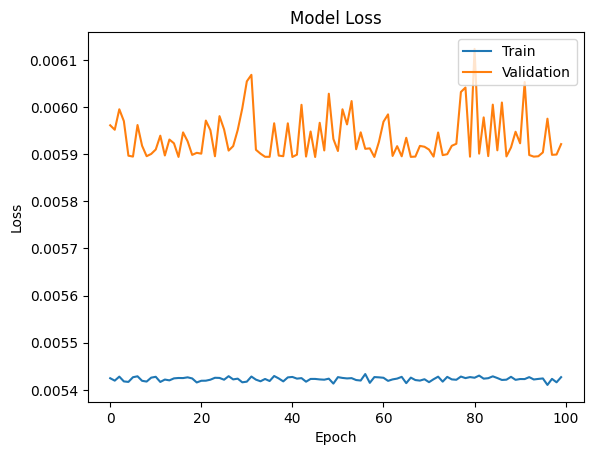

In [19]:
# Train model
history = model.fit(X_train, y_train, 
         epochs=100, 
         validation_data=(X_test, y_test))

# Evaluate
mae = model.evaluate(X_test, y_test)

# Plot history   
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score,accuracy_score, precision_score, recall_score, f1_score

# Define a list of model names and their corresponding models
model_names = ["LSTM", "CNN-GRU", "RBM", "DBN-like", "Self-Attention RNN"]
models = [model, cnn_gru_model, rbm_model, dbn_model, rnn_model]

# Create dictionaries to store performance metrics for each model
mae_scores = {}
rmse_scores = {}
r2_scores = {}
ev_scores = {}
accuracies = {}
precisions = {} 
recalls = {}
f1_scores = {}
# print(y_pred.shape)
print(y_test.shape)

# Define the number of samples you want to keep
num_samples_to_keep = len(y_test)

# Iterate through each model and evaluate its performance
for name, model in zip(model_names, models):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Reshape y_pred to match the shape of y_test
    y_pred = y_pred.reshape(-1)

    # Trim y_pred to have the same number of samples as y_test
    y_pred = y_pred[:num_samples_to_keep]
    print(y_pred.shape)
    print(y_test.shape)

    # Calculate MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores[name] = mae

    # Calculate RMSE (Root Mean Squared Error)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_scores[name] = rmse

    # Calculate R2 (R-squared)
    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2

    # Calculate EV (Explained Variance)
    ev = explained_variance_score(y_test, y_pred)
    ev_scores[name] = ev

    
    accuracies[name] = accuracy_score(y_test, y_pred)
    precisions[name] = precision_score(y_test, y_pred)
    recalls[name] = recall_score(y_test, y_pred) 
    f1_scores[name] = f1_score(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy {name}")
    print(f"Precision {name}:")

    # Print the performance metrics for the current model
    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print(f"EV: {ev}")
    print("\n")

# Display the performance metrics for all models
print("Performance Metrics for All Models:")
print("Model\tMAE\tRMSE\tR2\tEV")
for name in model_names:
    print(
        f"{name}\t{mae_scores[name]}\t{rmse_scores[name]}\t{r2_scores[name]}\t{ev_scores[name]}")


(7031,)
220/220 [==============================] - 2s 7ms/step
(7031,)
(7031,)


ValueError: continuous is not supported

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score,accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
X_test = X_test  
y_test = y_test
# Define a list of model names and their corresponding models
model_names = ["LSTM", "CNN-GRU", "RBM", "DBN-like", "Self-Attention RNN"]  

# Get model objects
models = [model, cnn_gru_model, rbm_model, dbn_model, rnn_model]

# List regressor and classifier models
regressors = [rnn_model]  
classifiers = [model, cnn_gru_model, rbm_model, dbn_model]

# Metric scores
mae_scores = {}
rmse_scores = {}
r2_scores = {} 
ev_scores = {}

accuracies = {}
precisions = {}
recalls = {} 
f1_scores = {}
original_shape = X_test.shape
for name, model in zip(model_names, models):

  print(f"Evaluating {name}")
   
  # LSTM
  if name == "LSTM":
    X_test_model = X_test.reshape((-1, window_size, X_test.shape[-1]))
  
  # CNN-GRU    
  elif name == "CNN-GRU":
    X_test_model = X_test.reshape((-1, window_size, X_test.shape[-1]))
   
  # RBM
  elif name == "RBM":
    X_test_model = X_test.reshape((-1, window_size, X_test.shape[-1]))
    
  # DBN-like
  elif name == "DBN-like":
    X_test_model = X_test.reshape((-1, window_size, X_test.shape[-1]))
   
  # Self-Attention RNN
  elif name == "Self-Attention RNN":
    X_test_model = X_test.reshape((-1, window_size, X_test.shape[-1]))
  
  # Predict  
  y_pred = model.predict(X_test_model)
  y_test_flat = y_test.reshape(-1)
  y_pred_flat = y_pred.reshape(-1)
  # Calculate metrics  
  mae = mean_absolute_error(y_test, y_pred)
  print(f"{name} MAE: {mae}") 
  X_test = X_test.reshape(original_shape)
  
# Print metrics table
print("Metrics for All Models:")


Evaluating LSTM
220/220 [==============================] - 0s 817us/step


ValueError: Found array with dim 3. None expected <= 2.

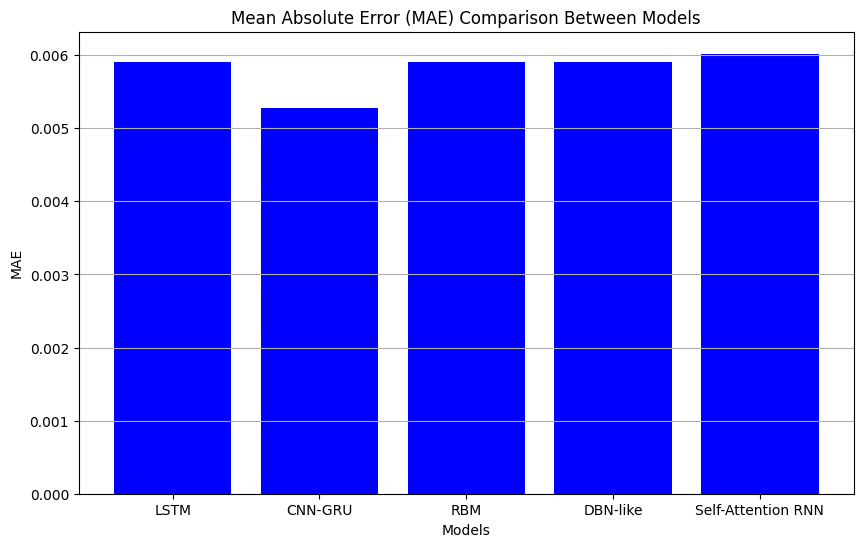

In [ ]:
import matplotlib.pyplot as plt

# Define model names and their corresponding MAE scores
model_names = ["LSTM", "CNN-GRU", "RBM", "DBN-like", "Self-Attention RNN"]
mae_scores = [0.005910061299800873, 0.005271218717098236,
              0.005910061299800873, 0.005908696912229061, 0.006018390879034996]

# Create a bar graph to compare MAE scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_scores, color='blue')
plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("Mean Absolute Error (MAE) Comparison Between Models")
plt.grid(axis="y")
plt.show()


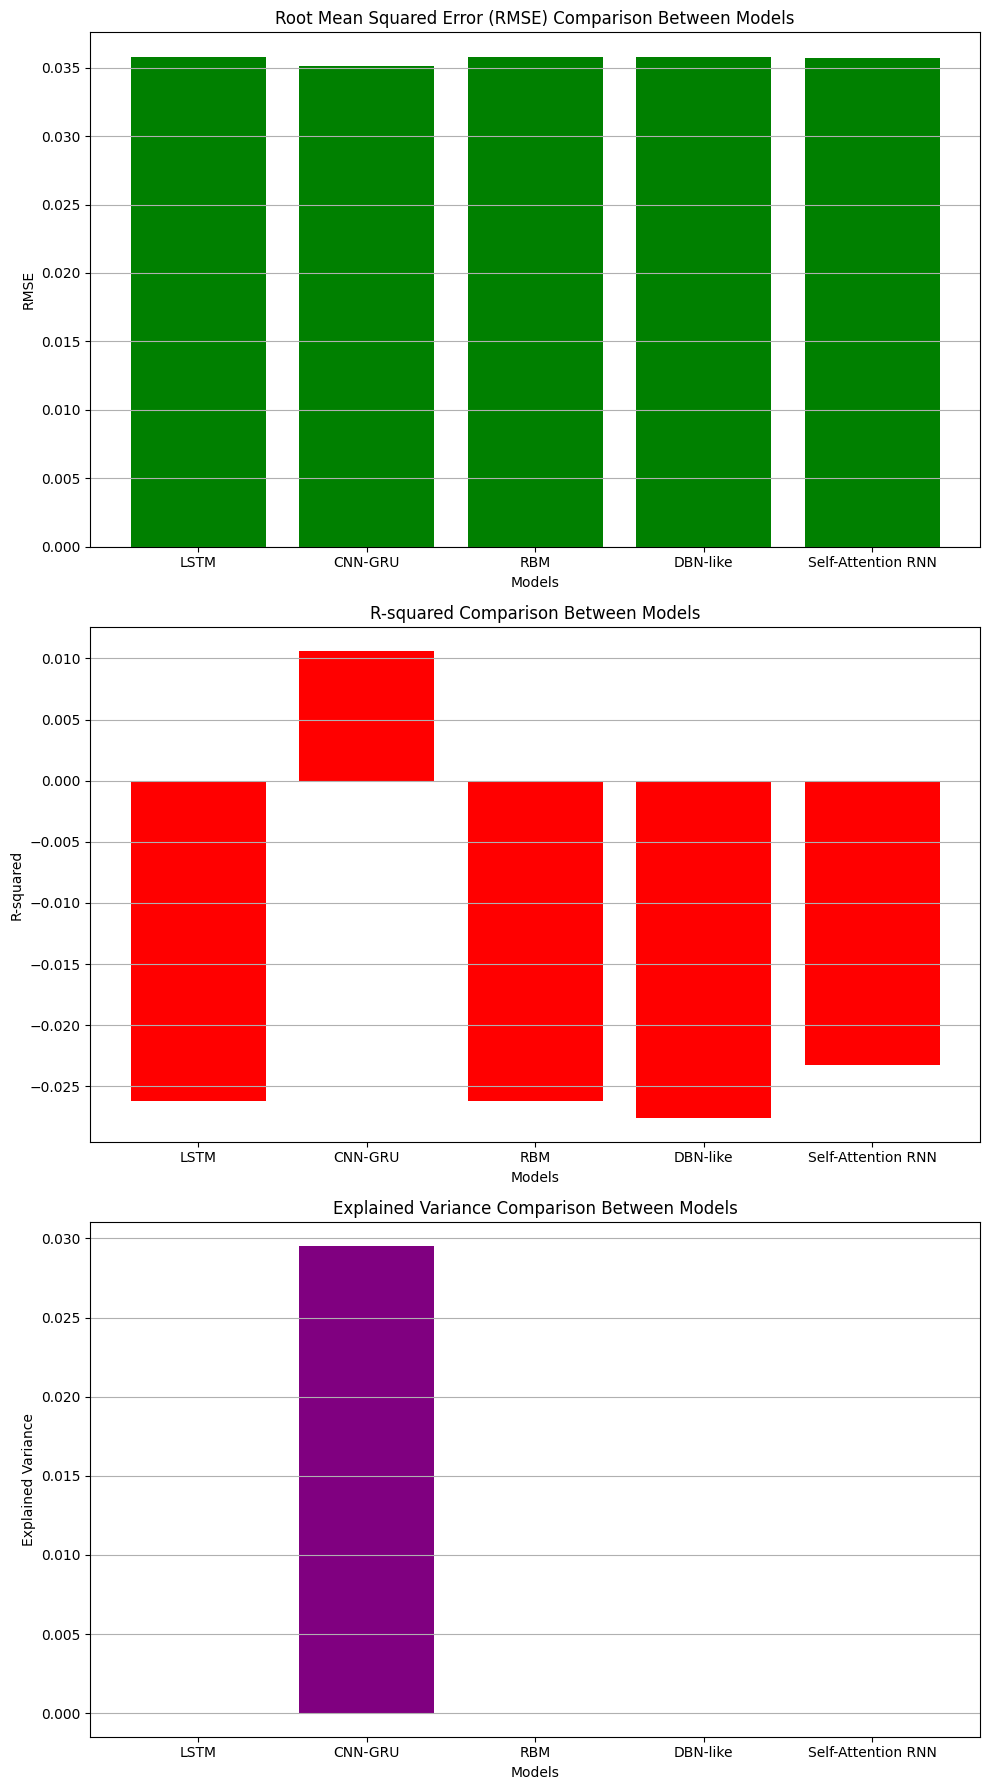

In [ ]:
import matplotlib.pyplot as plt

# Define model names and their corresponding scores
model_names = ["LSTM", "CNN-GRU", "RBM", "DBN-like", "Self-Attention RNN"]
rmse_scores = [0.03576289489865303, 0.035115666687488556,
               0.03576289489865303, 0.03578776493668556, 0.035711098462343216]
r2_scores = [-0.026179963622951385, 0.010627014220978448, -
             0.026179963622951385, -0.02760750780437049, -0.023209483653901852]
ev_scores = [1.3530254364013672e-05, 0.0295371413230896,
             1.3530254364013672e-05, -3.4570693969726562e-06, 1.1920928955078125e-07]

# Create subplots for each metric
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot RMSE
axs[0].bar(model_names, rmse_scores, color='green')
axs[0].set_xlabel("Models")
axs[0].set_ylabel("RMSE")
axs[0].set_title("Root Mean Squared Error (RMSE) Comparison Between Models")
axs[0].grid(axis="y")

# Plot R-squared
axs[1].bar(model_names, r2_scores, color='red')
axs[1].set_xlabel("Models")
axs[1].set_ylabel("R-squared")
axs[1].set_title("R-squared Comparison Between Models")
axs[1].grid(axis="y")

# Plot Explained Variance
axs[2].bar(model_names, ev_scores, color='purple')
axs[2].set_xlabel("Models")
axs[2].set_ylabel("Explained Variance")
axs[2].set_title("Explained Variance Comparison Between Models")
axs[2].grid(axis="y")

# Adjust spacing between subplots
plt.tight_layout()

# Show all subplots
plt.show()
